# Deep Learning Binary Classification with Keras
* name : Jikhan Jeong
* reference: Deep Learning with Python
* output layer should use softmax
* binary classification loss = binary crossentropy

In [1]:
from PIL import Image
import numpy as np
import os

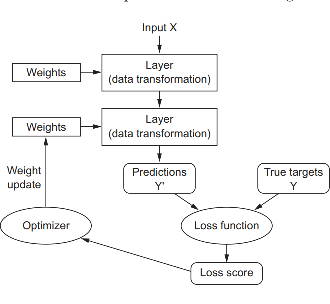

In [2]:
nn_concept ='nn.png'
nn_concept = Image.open(nn_concept)
nn_concept.resize((330, 304))

# Loss function
* a binary classfication = binary crossentropy
* a multi-class classification = categorical crossentropy
* a regression = mean squred error 

# (IMDB) Movie Binary Classification Example 

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


* feature : review data, a list of word indices (a seq of words), top 10000 frequenctly used words
* label : positive (=1) vs negative 

In [27]:
len(train_data[0])

218

In [28]:
train_labels[0] # 0 or 1 = binary

1

In [4]:
max([max(sequence) for sequence in train_data]) # start from 0 to 9999 = total 10,000

9999

* decoding 

In [5]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]) #-3 means some setting, not important

In [6]:
import numpy as np

* vectorize feature = vector

In [7]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) # row = length of sequence and col = 10000, col is a word of bag
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1.
        return results

In [23]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

* vectorize label = scalar

In [25]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

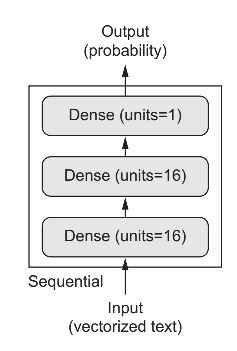

In [11]:
movie ='movie.png'
movie= Image.open(movie)
movie.size
movie.resize((237, 351))

In [12]:
from keras import models
from keras import layers

In [15]:
model = models.Sequential()

In [14]:
model.add(layers.Dense(16, activation ='relu', input_shape=(10000,))) # word of bag = 10000 word dummy vector

In [16]:
model.add(layers.Dense(16, activation='relu'))

In [17]:
model.add(layers.Dense(1, activation='sigmoid')) # output binary outcome 

* Compiling the model

In [44]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

* Valdation set 

In [26]:
x_val= x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [30]:
def set_shape(sets):
    print(sets.shape)
    pass

In [31]:
set_shape(x_val)
set_shape(y_val)
set_shape(partial_x_train)
set_shape(partial_y_train)

(10000, 10000)
(10000,)
(15000, 10000)
(15000,)


In [70]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,                        # iteration
                   batch_size=512,                   # batch size 
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - 

* .history calls the data generated during the traning (=fitting)

In [71]:
history_dict = history.history # history is the modthod call the data during the training

In [72]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

* Plotting the training and validation loss

In [54]:
import matplotlib.pyplot as plt

In [73]:
loss_values = history_dict['loss'] # training set loss
val_loss_values = history_dict['val_loss'] # validation loss

len(loss_values)
len(val_loss_values)

epochs = range(1, 20 + 1) # from 1 to length of acc

In [74]:
len(loss_values)

20

In [75]:
len(val_loss_values)

20

In [76]:
len(epochs)

20

In [41]:
for i in range(1,3):
    print(i)
    pass

1
2


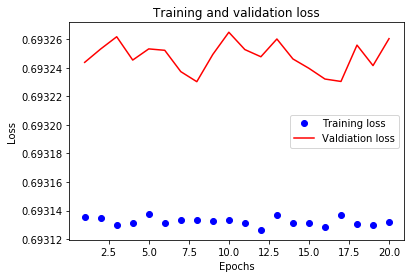

In [77]:
plt.plot(epochs, loss_values, 'bo', label ='Training loss') # bo = blue dot
plt.plot(epochs, val_loss_values, 'r', label = 'Valdiation loss') # b = blue, r = red
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* Training and Validation Accuracy

In [78]:
plt.clf() # clear the graph in the previous

<Figure size 432x288 with 0 Axes>

In [79]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

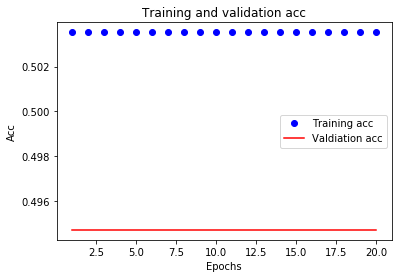

In [80]:
plt.plot(epochs, acc_values, 'bo', label ='Training acc') # bo = blue dot
plt.plot(epochs, val_acc_values, 'r', label = 'Valdiation acc') # b = blue, r = red
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

* evaluation with test set, test set prediction accuracy

In [81]:
results = model.evaluate(x_test, y_test) # second column is test accuracy

25000/25000 [==============================] - 6s 231us/step


In [84]:
results # accurarcy is 50%

[0.69317112449646, 0.5]

In [86]:
predicted_label_test = model.predict(x_test)

In [87]:
predicted_label_test

array([[0.44000056],
       [0.49624753],
       [0.49624753],
       ...,
       [0.49624753],
       [0.49624753],
       [0.49624753]], dtype=float32)

In [88]:
predicted_label_test = np.where(predicted_label_test > .5, 1, 0)

In [89]:
predicted_label_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [90]:
type(predicted_label_test)

numpy.ndarray

In [94]:
sum_of_yes = np.ndarray.sum(predicted_label_test)

In [95]:
sum_of_yes 

0